# 데이터 시각화


In [1]:
import pandas as pd
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import seaborn as sns
df = pd.read_excel('C:/Users/USER/data_crawling/kto_total.xlsx')
df

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),유학생비율(%),관광객_전체비율(%),유학생_전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,0.3,50.6,10.7
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,0.1,8.9,0.7
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,0.1,3.5,0.4
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.0,0.1,0.0
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,0.3,3.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,대양주,20.0,0.0,0.0,0.0
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,3.4,0.0,0.0,0.0
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2.3,4.6,0.0,0.3
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,25.0,0.0,0.0,0.0


In [2]:
#Font
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
    print('shooot')
else:
    print('check your OS')

shooot


In [3]:
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),유학생비율(%),관광객_전체비율(%),유학생_전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,3.0,10.1,53.8
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,21.0,13.6,82.9
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,10.6,9.2,84.9
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,1.5,15.5,73.4
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,1.9,17.0,72.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.7,2.2,38.2,50.7
7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.6,19.9,9.8,49.3
7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.4,44.5,16.0,52.0
7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.3,28.3,10.2,15.6


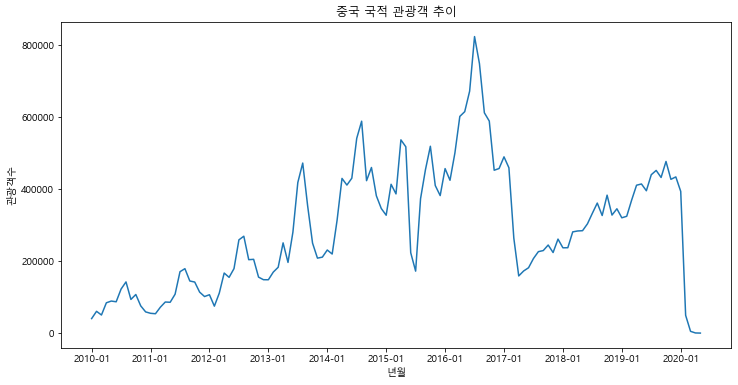

In [4]:
#시계열 그래프 그리기
plt.figure(figsize = (12,6))
plt.plot(df_filter['기준연월'], df_filter['관광'])

plt.title('중국 국적 관광객 추이')
plt.xlabel('년월')
plt.ylabel('관광객수')

plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])
plt.show()

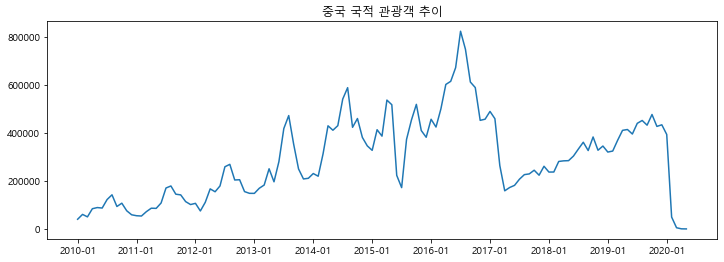

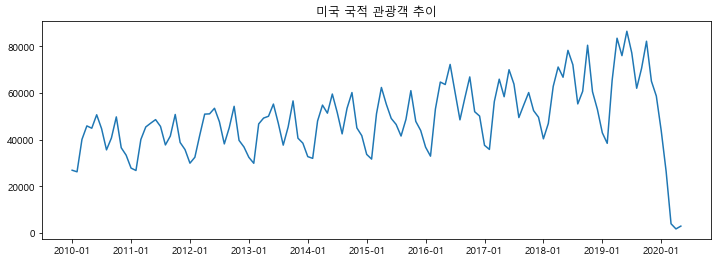

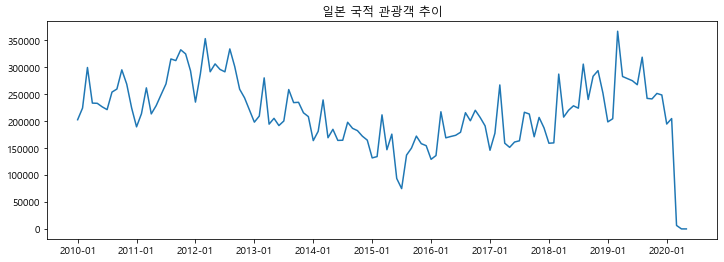

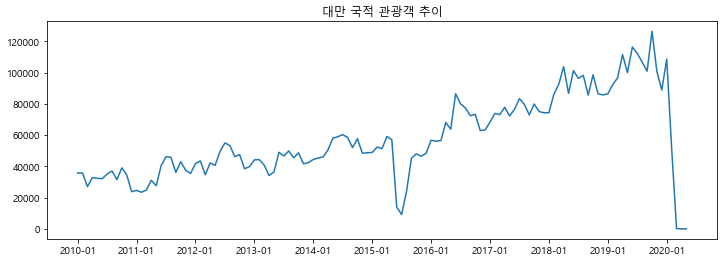

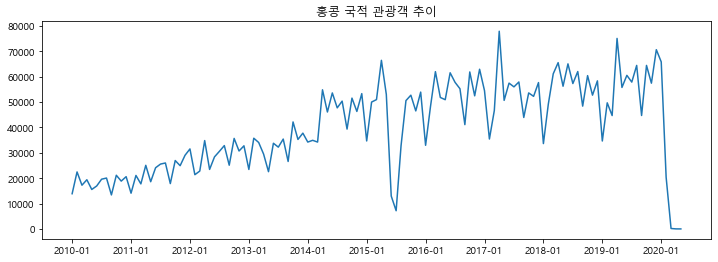

In [5]:
#우리나라 방문하는 외국인 관광객 중 상위 5개 국가 리스ㅡ트 만들기(중,일,대,미,홍)

cntry_list = ['중국', '미국', '일본', '대만', '홍콩']

for cntry in cntry_list:
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    plt.figure(figsize = (12,4))
    plt.plot(df_filter['기준연월'], df_filter['관광'])
    plt.title(f'{cntry} 국적 관광객 추이')
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])
    
    plt.show()
    
    

In [6]:
#heatmap 그래프 그리기
#str.slice 함수 이용해 연도, 월 칼럼 만들기

df['연도'] = df['기준연월'].str.slice(0,4)
df['월'] = df['기준연월'].str.slice(5,7)
df

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),유학생비율(%),관광객_전체비율(%),유학생_전체비율(%),연도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,0.3,50.6,10.7,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,0.1,8.9,0.7,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,0.1,3.5,0.4,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.0,0.1,0.0,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,0.3,3.3,1.0,2010,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,대양주,20.0,0.0,0.0,0.0,2020,05
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,3.4,0.0,0.0,0.0,2020,05
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2.3,4.6,0.0,0.3,2020,05
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,25.0,0.0,0.0,0.0,2020,05


In [7]:
condition = (df['국적'] == '중국')
df_filter = df[condition]

df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),유학생비율(%),관광객_전체비율(%),유학생_전체비율(%),연도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,3.0,10.1,53.8,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,21.0,13.6,82.9,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,10.6,9.2,84.9,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,1.5,15.5,73.4,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,1.9,17.0,72.6,2010,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.7,2.2,38.2,50.7,2020,01
7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.6,19.9,9.8,49.3,2020,02
7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.4,44.5,16.0,52.0,2020,03
7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.3,28.3,10.2,15.6,2020,04


In [8]:
#pivot table 그리기
df_pivot = df_filter.pivot_table(values = '관광'
                         , index = '연도'
                         , columns = '월')

df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
연도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


Text(0.5, 1.0, '홍콩 관광객 heatmap')

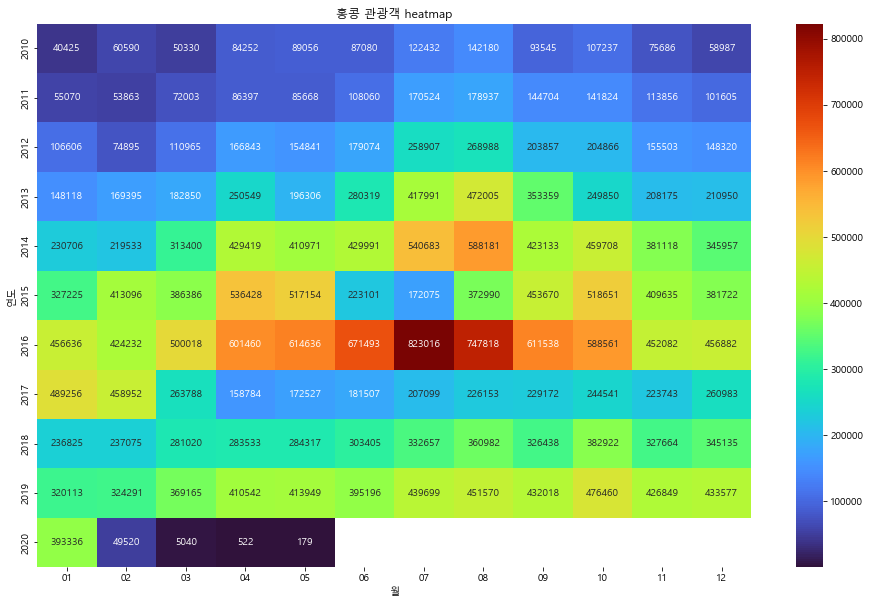

In [9]:
# 히트맵 그리기
plt.figure(figsize = (16, 10))

sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'turbo') #annot - 안쪽 숫자 있는지 없는지

plt.title(f'{cntry} 관광객 heatmap')


In [10]:
print(cntry_list)

['중국', '미국', '일본', '대만', '홍콩']


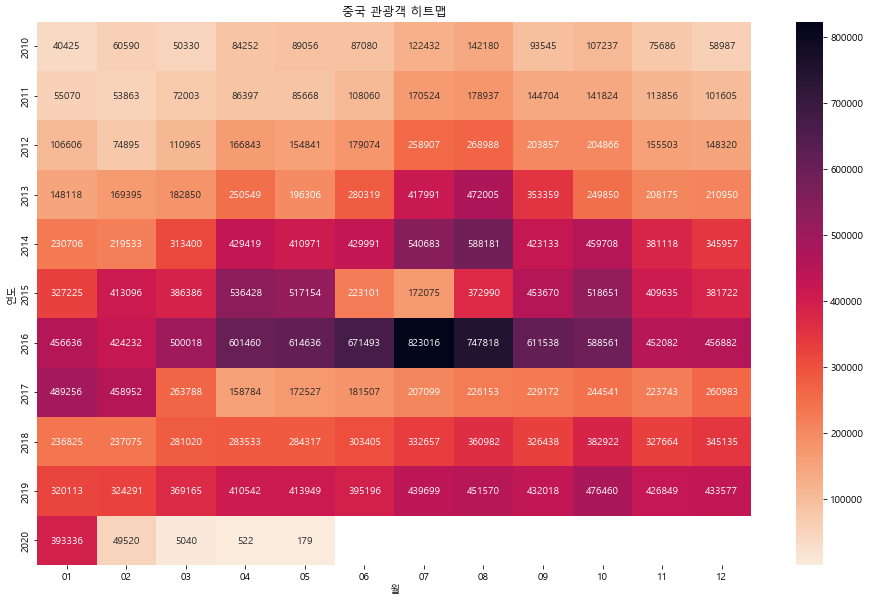

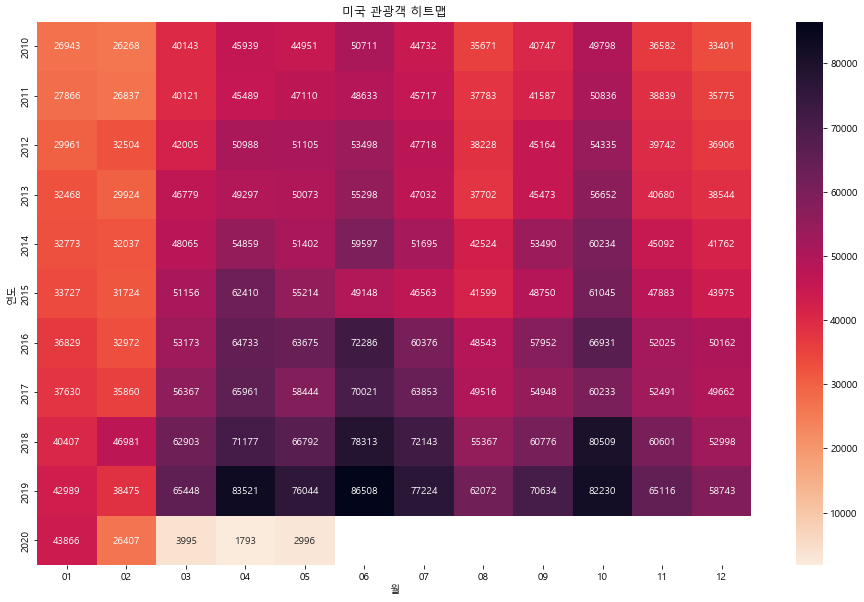

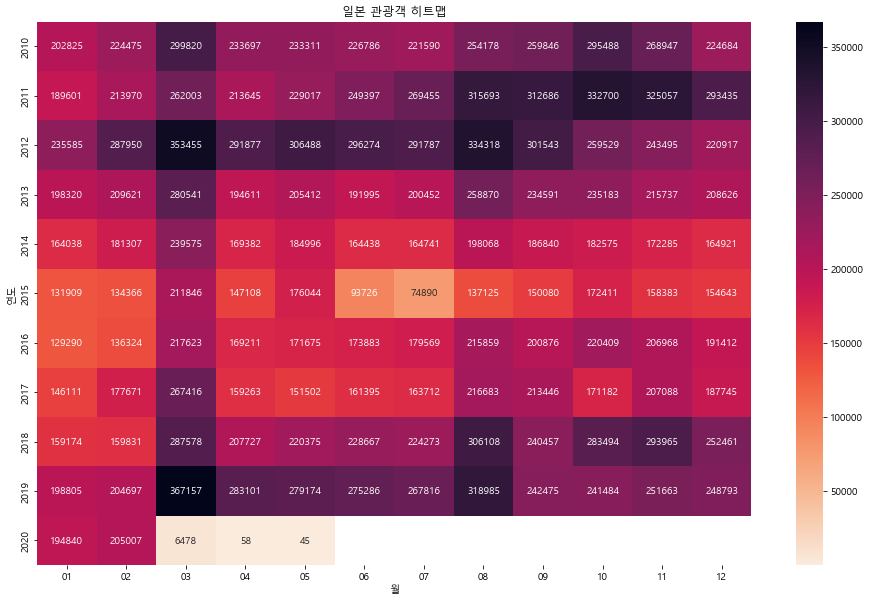

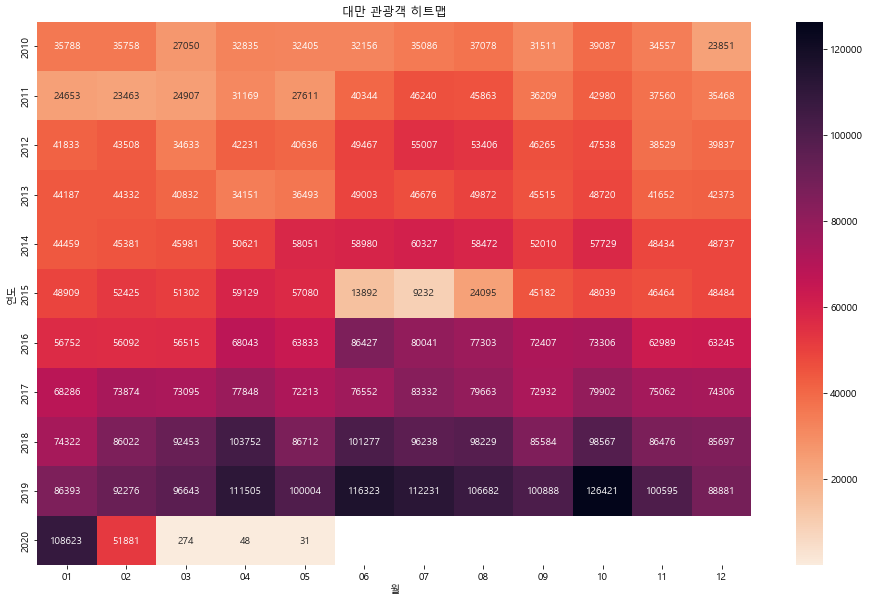

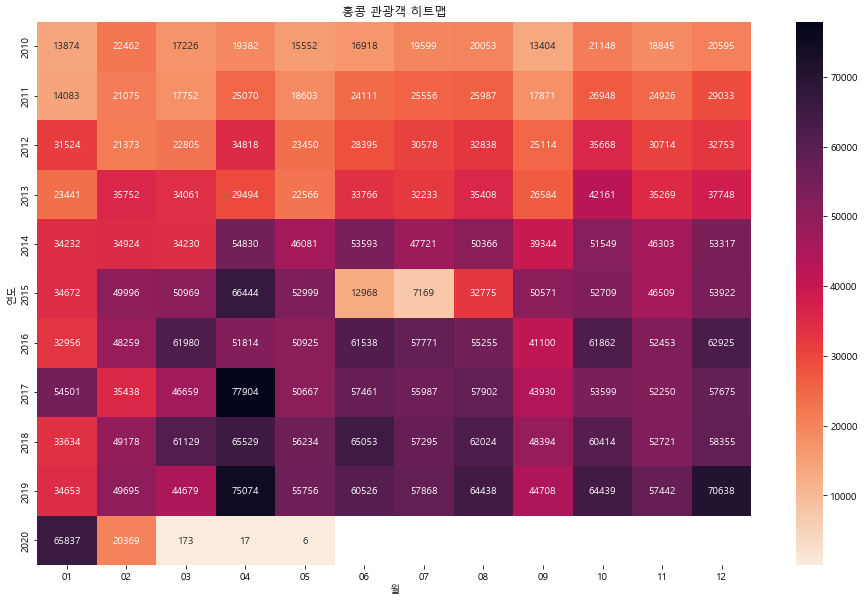

In [11]:
#상위 5개 히트맵 그리기
cmap_list = ['gray', 'hot', 'spring', 'mako', 'winter']
# 예제 4-55 반복문으로 상위 5개국에 대한 히트맵 그래프 그리기 
for cntry in cntry_list: 
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    df_pivot = df_filter.pivot_table(values = '관광'
                             , index = '연도'
                             , columns = '월')
    
    # 그래프 크기 설정 
    plt.figure(figsize = (16, 10))

    # 히트맵 그래프 그리기 
    sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')

    # 그래프 타이틀 달기 
    plt.title('{} 관광객 히트맵'.format(cntry))

    # 그래프 표현 
    plt.show()
    